<a href="https://colab.research.google.com/github/oborominami/oborominami/blob/master/Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Project Name    : Machine Learning
 
 File Name       : Trial.ipynb
 
 Creation Date   : Jun 9 2021
 
 Copyright (c) 2021 KAMAKE no SUSUME. All rights reserved.
 
 This source code or any portion thereof must not be reproduced or used in any manner whatsoever.

In [ ]:
%cd /content/drive/MyDrive/Colab/Trial

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab/Trial'
/content


テキスト

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


コメント

In [ ]:
!ls

drive  sample_data


In [ ]:
%cd directory-name

[Errno 2] No such file or directory: 'directory-name'
/content


In [ ]:
!cat file-name

cat: file-name: No such file or directory


In [ ]:
!pwd

/content


In [ ]:
%cd /content/drive/MyDrive/Colab/Trial

/content/drive/MyDrive/Colab/Trial


In [ ]:
%run prepare_images.py datasets/dice_top_crop

Copied images from datasets/dice_top_crop/1
Copied images from datasets/dice_top_crop/2
Copied images from datasets/dice_top_crop/3
Copied images from datasets/dice_top_crop/4
Copied images from datasets/dice_top_crop/5
Copied images from datasets/dice_top_crop/6


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import shutil
import math
from IPython.display import Image as IPImage
from IPython.display import display_jpeg
import visualize

print(tf.__version__)

train_dir = 'target_datasets/train'
val_dir = 'target_datasets/val'

backup_dir = './model'

labels = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
labels.sort()

if os.path.exists(backup_dir):
    shutil.rmtree(backup_dir)

os.makedirs(backup_dir)

with open(backup_dir + '/labels.txt','w') as f:
    for label in labels:
        f.write(label+"\n")

NUM_CLASSES = len(labels)
print("class number=" + str(NUM_CLASSES))

labels = []
with open(backup_dir + '/labels.txt','r') as f:
    for line in f:
        labels.append(line.rstrip())
print(labels)

2.5.0
class number=6
['1', '2', '3', '4', '5', '6']


Found 72 images belonging to 6 classes.
Found 22 images belonging to 6 classes.
## Train Data Sample ##


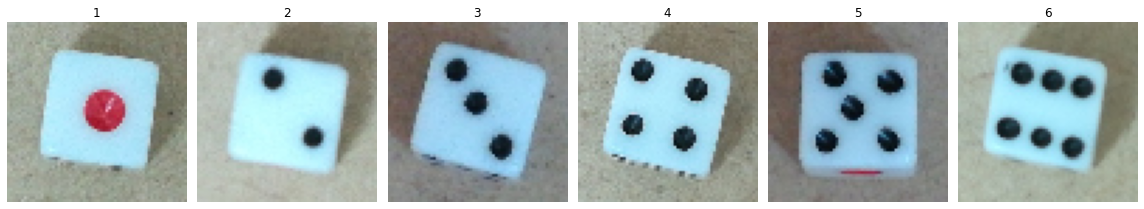

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 8)         224       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 8)         584       
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 7688)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               9

In [ ]:
# 学習率
LEARNING_RATE = 0.001
# エポック（世代数）
EPOCHS = 12
# バッチサイズ
BATCH_SIZE = 8

IMAGE_SIZE = 64

train_data_gen = ImageDataGenerator(rescale=1./255)
#train_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=180, width_shift_range=0.2, height_shift_range=0.2)
val_data_gen = ImageDataGenerator(rescale=1./255)

# メモ：ImageDataGenerator.flow_from_directory はIteratorを返す
train_data = train_data_gen.flow_from_directory(
    train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)

validation_data = val_data_gen.flow_from_directory(
    val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=False)

# Display train data sample
visualize.pick_train_sample(labels, train_data)

# AI model definition
model = Sequential()

model.add(Conv2D(8, (3, 3), padding='same',
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Activation('relu'))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
#opt = tf.keras.optimizers.SGD(lr=LEARNING_RATE)

model.compile(opt, loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

# Execute train
history = model.fit(train_data, epochs=EPOCHS, validation_data=validation_data, verbose=1)

score = model.evaluate(validation_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Prediction data
[[0.977 0.007 0.014 0.    0.001 0.   ]
 [0.961 0.004 0.035 0.    0.001 0.   ]
 [0.992 0.001 0.006 0.    0.    0.   ]
 [0.981 0.    0.018 0.    0.001 0.   ]
 [0.002 0.71  0.094 0.175 0.008 0.011]
 [0.006 0.836 0.02  0.123 0.006 0.009]
 [0.005 0.916 0.05  0.022 0.005 0.003]
 [0.008 0.792 0.057 0.131 0.004 0.008]
 [0.062 0.089 0.763 0.    0.086 0.   ]
 [0.051 0.093 0.806 0.002 0.045 0.003]
 [0.07  0.139 0.193 0.008 0.587 0.003]
 [0.002 0.03  0.877 0.    0.091 0.   ]
 [0.001 0.308 0.024 0.248 0.003 0.416]
 [0.001 0.018 0.001 0.262 0.039 0.679]
 [0.003 0.62  0.046 0.182 0.008 0.14 ]
 [0.    0.252 0.009 0.651 0.001 0.087]
 [0.002 0.001 0.061 0.002 0.886 0.048]
 [0.    0.022 0.816 0.006 0.139 0.016]
 [0.    0.03  0.48  0.017 0.456 0.017]
 [0.001 0.007 0.001 0.31  0.039 0.642]
 [0.    0.    0.    0.232 0.007 0.761]
 [0.    0.003 0.    0.611 0.062 0.325]]
(22, 6)
#0 Expected:1 -> Predicted:1
File: 1/IMG_20210418_174644.jpg
Each Prediction Value: [0.977 0.007 0.014 0.    0.001 0.

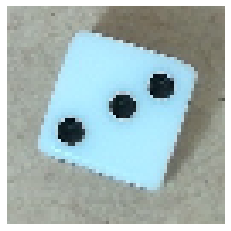

#11 Expected:3 -> Predicted:3
File: 3/IMG_20210418_180657.jpg
Each Prediction Value: [0.002 0.03  0.877 0.    0.091 0.   ]
* Correct *
#12 Expected:4 -> Predicted:6
File: 4/IMG_20210418_174900.jpg
Each Prediction Value: [0.001 0.308 0.024 0.248 0.003 0.416]
**** INCORRECT ****


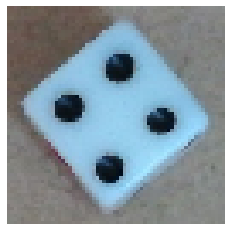

#13 Expected:4 -> Predicted:6
File: 4/IMG_20210418_175106.jpg
Each Prediction Value: [0.001 0.018 0.001 0.262 0.039 0.679]
**** INCORRECT ****


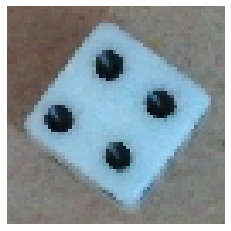

#14 Expected:4 -> Predicted:2
File: 4/IMG_20210418_175112.jpg
Each Prediction Value: [0.003 0.62  0.046 0.182 0.008 0.14 ]
**** INCORRECT ****


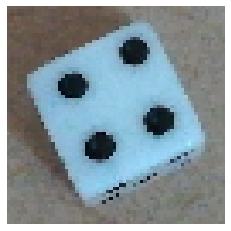

#15 Expected:4 -> Predicted:4
File: 4/IMG_20210418_180736.jpg
Each Prediction Value: [0.    0.252 0.009 0.651 0.001 0.087]
* Correct *
#16 Expected:5 -> Predicted:5
File: 5/IMG_20210418_174930.jpg
Each Prediction Value: [0.002 0.001 0.061 0.002 0.886 0.048]
* Correct *
#17 Expected:5 -> Predicted:3
File: 5/IMG_20210418_180801.jpg
Each Prediction Value: [0.    0.022 0.816 0.006 0.139 0.016]
**** INCORRECT ****


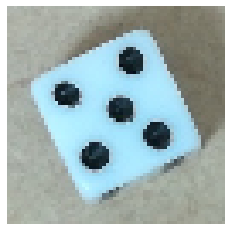

#18 Expected:5 -> Predicted:3
File: 5/IMG_20210418_180823.jpg
Each Prediction Value: [0.    0.03  0.48  0.017 0.456 0.017]
**** INCORRECT ****


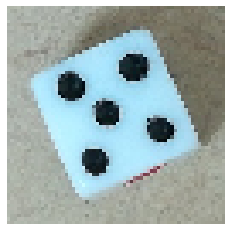

#19 Expected:6 -> Predicted:6
File: 6/IMG_20210418_174953.jpg
Each Prediction Value: [0.001 0.007 0.001 0.31  0.039 0.642]
* Correct *
#20 Expected:6 -> Predicted:6
File: 6/IMG_20210418_180836.jpg
Each Prediction Value: [0.    0.    0.    0.232 0.007 0.761]
* Correct *
#21 Expected:6 -> Predicted:4
File: 6/IMG_20210418_180840.jpg
Each Prediction Value: [0.    0.003 0.    0.611 0.062 0.325]
**** INCORRECT ****


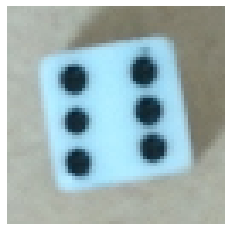

Loss


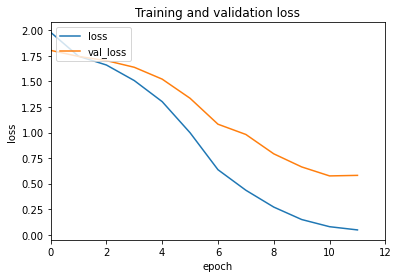

Accuracy


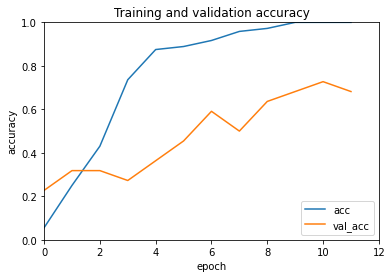

Confusion Matrix


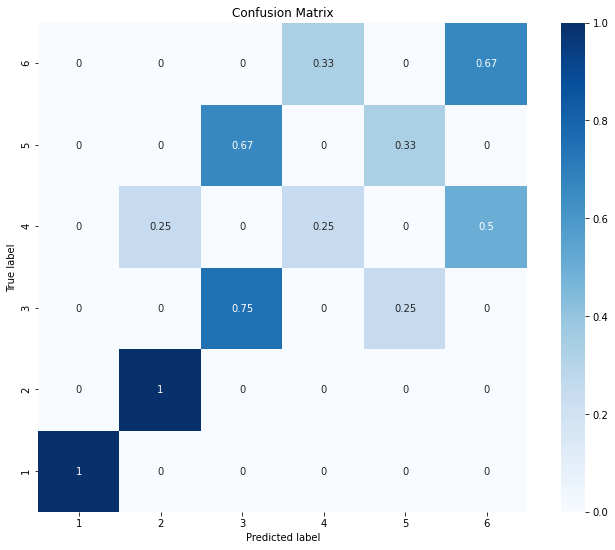

In [ ]:
# Failed pictures
visualize.vis_failed_pic(model, labels, validation_data, val_dir, BATCH_SIZE, 100)

# Visualize loss
visualize.vis_loss_accuracy(history, EPOCHS)

# Save model
save_model_path = os.path.join(backup_dir, 'my_model.h5')
model.save(save_model_path)

# Confusion Matrix
visualize.vis_confusion_matrix(model, validation_data)

Visualize filter: conv2d


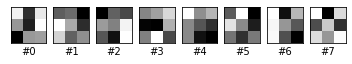

Visualize filter: conv2d_1


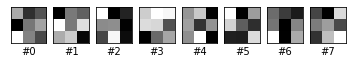

In [ ]:
visualize.vis_filter(model, 'conv2d')
visualize.vis_filter(model, 'conv2d_1')

In [ ]:
!cat incorrect.txt

target_datasets/val/3/IMG_20210418_180654.jpg
target_datasets/val/4/IMG_20210418_174900.jpg
target_datasets/val/4/IMG_20210418_175106.jpg
target_datasets/val/4/IMG_20210418_175112.jpg
target_datasets/val/5/IMG_20210418_180801.jpg
target_datasets/val/5/IMG_20210418_180823.jpg
target_datasets/val/6/IMG_20210418_180840.jpg


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 8)         224       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 8)         584       
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 7688)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               9

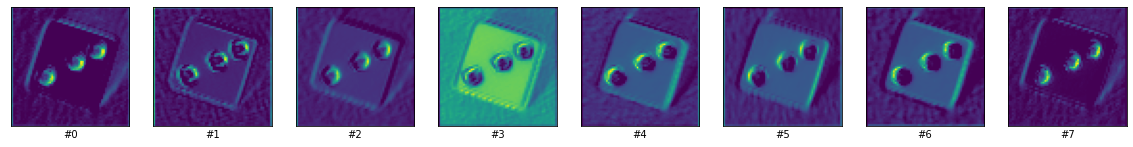

target_datasets/val/4/IMG_20210418_174900.jpg


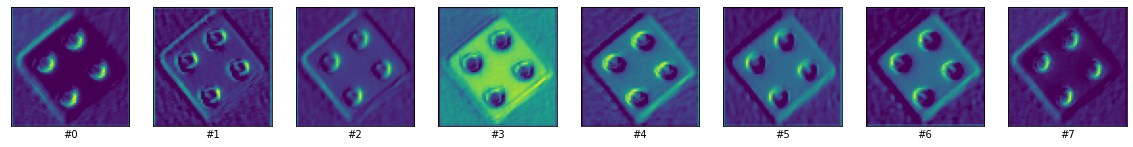

target_datasets/val/4/IMG_20210418_175106.jpg


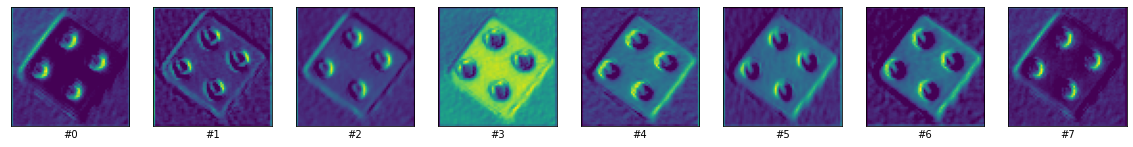

target_datasets/val/4/IMG_20210418_175112.jpg


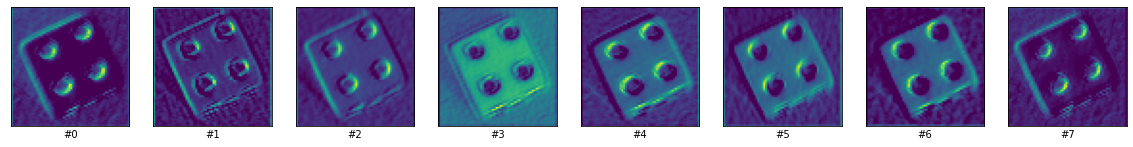

target_datasets/val/5/IMG_20210418_180801.jpg


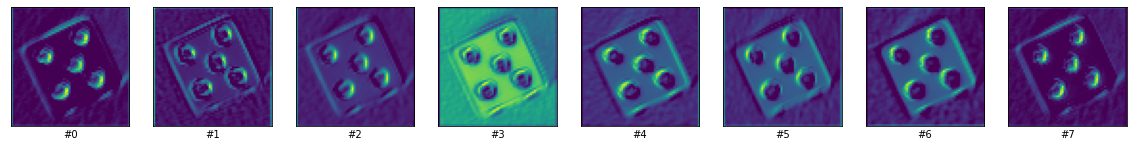

target_datasets/val/5/IMG_20210418_180823.jpg


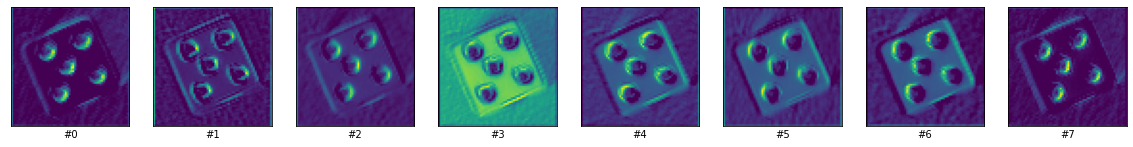

target_datasets/val/6/IMG_20210418_180840.jpg


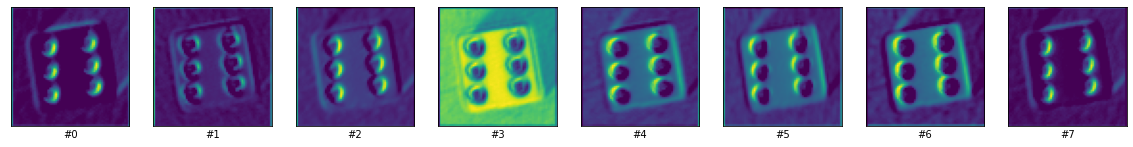

In [ ]:
visualize.vis_hidden_layer('incorrect.txt', 'activation_1')